In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('nhanes_2015_2016.csv')

In [5]:
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
data.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [7]:
keep = [column for column in data.columns if 'BM' in column]
keep

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [11]:
data[keep].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


In [13]:
waist_median = data.BMXWAIST.median()

In [18]:
data[(data.BMXWAIST > waist_median) & (data.BMXLEG < 32)].head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
15,83757,1.0,NaN,1.0,2,2,57,2,1.0,1.0,4.0,5,11709.11,1,120,0.77,134.0,68.0,146.0,62.0,80.5,150.8,35.4,31.6,32.7,33.7,113.5,2.0
27,83785,2.0,1.0,1.0,1,2,60,2,1.0,5.0,3.0,4,10495.87,1,128,5.00,142.0,74.0,136.0,74.0,75.6,145.2,35.9,31.0,33.1,36.0,108.0,2.0
39,83812,1.0,NaN,2.0,2,2,68,1,1.0,3.0,1.0,3,10255.97,1,124,5.00,124.0,56.0,114.0,66.0,63.7,147.9,29.1,26.0,34.0,31.5,110.0,2.0
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,4.0,5,11709.11,1,121,1.41,104.0,76.0,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,1.0,7,15415.16,1,133,2.18,112.0,68.0,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0


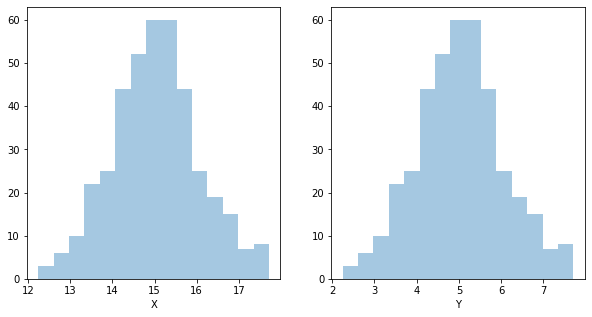

In [33]:
r = 1

mean = [15, 5]
cov = [[1, r], [r, 1]]

x, y = np.random.multivariate_normal(mean, cov, 400).T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# plt.hist(x=x, bins=15)
sns.distplot(x, bins=15, kde=False, axlabel="X")
# plt.title("X")

plt.subplot(1, 2, 2)
# plt.hist(x=y, bins=15)
sns.distplot(y, bins=15, kde=False, axlabel="Y")
# plt.title("Y")

plt.show()

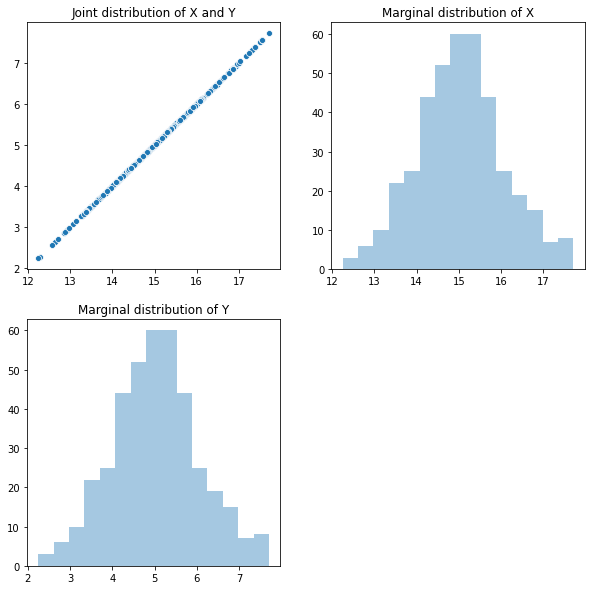

In [37]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x, y)
plt.title("Joint distribution of X and Y")

plt.subplot(2, 2, 2)
sns.distplot(x, bins=15, kde=False)
plt.title("Marginal distribution of X")

plt.subplot(2, 2, 3)
sns.distplot(y, bins=15, kde=False)
plt.title("Marginal distribution of Y")

plt.show()